In [295]:
import os
import warnings
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\analyse_csv.csv" 
df_final = pd.read_csv(file_path)

In [296]:
#compute the median price per square meter for each localities and add these prices to the dataframe
file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\area_analyse\square_meter_csv.csv" 
df_square_meter = pd.read_csv(file_path)
df_final = pd.merge(df_final, df_square_meter, on = 'Locality')

In [297]:
#df_final['Total_Area'] = df_final["Living_Area"] + df_final["Terrace_Area"] + df_final["Garden_Area"]

In [298]:
#delete outliers (refer to area.ipynb file to see boxplot)
df_final = df_final[df_final['Living_Area'] < 400]

In [299]:
#based on the price of the property and the price per square meter of the locality, compute the supposed living area of the property 
df_final['Supposed_Square_Meter'] = df_final['Price'] / df_final['Median_Price_Squared_Meter']

In [300]:
#get one random line for each unique Living Area
df_final = df_final.groupby('Living_Area').sample()
#df_final = df_final.groupby('Total_Area').sample()

<function matplotlib.pyplot.show(close=None, block=None)>

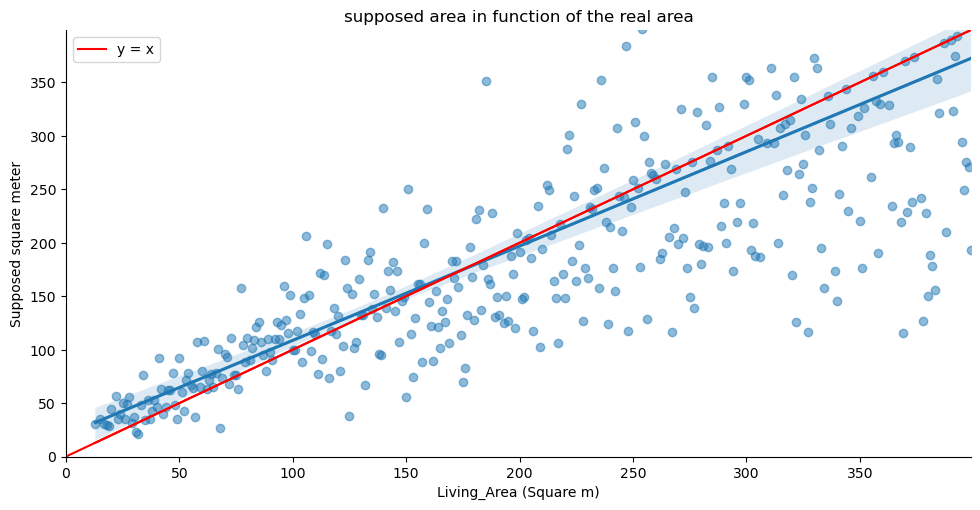

In [301]:
sns.lmplot(x="Living_Area", y="Supposed_Square_Meter", data=df_final, scatter_kws={'alpha':0.5}, aspect=2)
sns.lineplot(x=df_final["Living_Area"], y=df_final["Living_Area"], label='y = x', color='red')

plt.xlabel('Living_Area (Square m)')
plt.ylabel('Supposed square meter')

# Add line y=x
plt.plot([0, max(df_final["Living_Area"])], [0, max(df_final["Living_Area"])], 'r-', label='y = x')

plt.xlim(0, max(df_final["Living_Area"]))
plt.ylim(0, max(df_final["Living_Area"]))

plt.title('supposed area in function of the real area')

plt.savefig(r'.\images\supposed_area.png', bbox_inches='tight')
plt.show

now let's try to add the state of the building:

In [302]:
#we keep tthe NAN but show they are NAN
df_final["State_of_the_building"] = df_final["State_of_the_building"].fillna("NAN")

<function matplotlib.pyplot.show(close=None, block=None)>

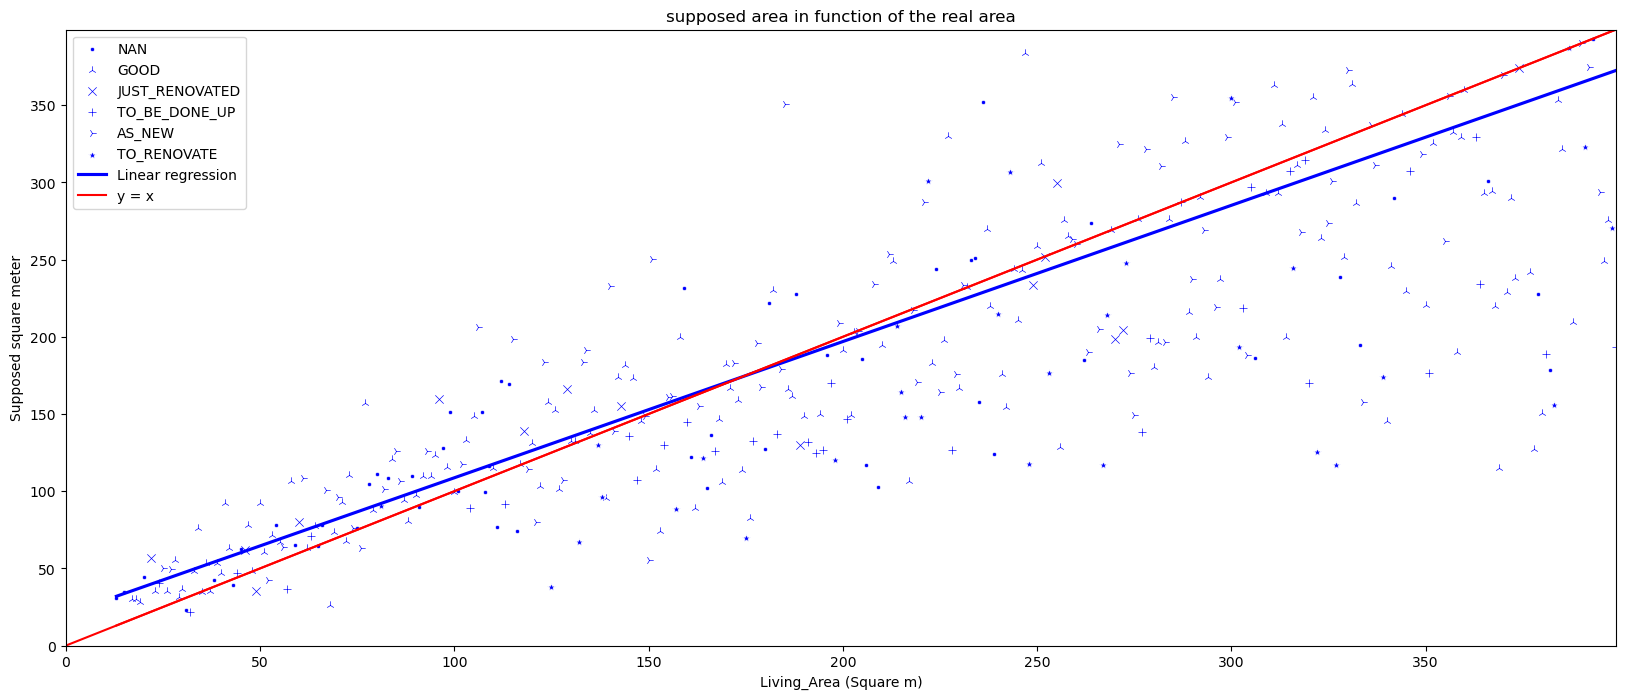

In [303]:
plt.figure(figsize=(20, 8))
markers = {'NAN': '.', 'GOOD': '2', 'JUST_RENOVATED': 'x', 'AS_NEW': '4', 'TO_BE_DONE_UP': '+', 'TO_RENOVATE':'*', 'TO_RESTORE':'3'} #put a marker = s this one will be more visible
for state in df_final['State_of_the_building'].unique():
    data = df_final[df_final['State_of_the_building'] == state]
    sns.scatterplot(x="Living_Area", y="Supposed_Square_Meter", data=data, marker = markers[state], alpha = 1, label = state, color='blue')

#draw the linear regression
sns.regplot(x="Living_Area", y="Supposed_Square_Meter", data=df_final, scatter=False, color='blue', ci=None, label='Linear regression')
#draw y=x (reference line)
sns.lineplot(x=df_final["Living_Area"], y=df_final["Living_Area"], label='y = x', color='red')

plt.xlabel('Living_Area (Square m)')
plt.ylabel('Supposed square meter')

plt.plot([0, max(df_final["Living_Area"])], [0, max(df_final["Living_Area"])], '-r', label='y = x')
plt.xlim(0, max(df_final["Living_Area"]))
plt.ylim(0, max(df_final["Living_Area"]))

plt.title('supposed area in function of the real area')

plt.savefig(r'.\images\supposed_area_state_building.png', bbox_inches='tight')
plt.show